<a href="https://colab.research.google.com/github/TangJiahui/6.036_Machine_Learning/blob/main/MIT_6_036_Fall_2020_Lab10_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIT 6.036 Fall 2020: Lab10#

This colab notebook runs the companion code for question 3 in MIT 6.036 Lab 10. You can work out your solutions here, then submit your results back on the lab page when ready. If you have not used colab before, ask your partner or a TA for help.

## <section>**Setup**</section>

First, run the next code block to download and import the code for this lab.

In [ ]:
!rm -rf code_for_lab10* __MACOSX data .DS_Store
!wget --quiet https://introml.odl.mit.edu/cat-soop/_static/6.036/labs/lab10/code_for_lab10.zip --no-check-certificate
!unzip code_for_lab10.zip
!mv code_for_lab10/* .

from code_for_lab10 import *
from grid_worlds2 import testGridGoalLearn, testGridSSPLearn

import numpy as np
import math as m
import random

import importlib

Archive:  code_for_lab10.zip
  inflating: code_for_lab10/code_for_lab10.py  
  inflating: code_for_lab10/dist.py  
  inflating: code_for_lab10/grid_worlds2.py  
  inflating: code_for_lab10/mdp.py   
  inflating: code_for_lab10/mdp10.py  
  inflating: code_for_lab10/util.py  


,,,,,,,,,


## 2) Q-Learning in a 2D grid

Now, we'll take a look at Q-learning in a simple 2D grid setting (like in last week's lab) but with a single goal location. We'll adopt the same state space and action space.

Some things to note about our implementation:

A new episode is started by sampling the first state uniformly at random.

The agent follows an epsilon-greedy policy with $\epsilon = 0.1$

Every action taken from the goal state leads to a zero-reward state that can never be escaped. Thus, to continue learning, we repeat the steps above.

In the case of a tie among $argmax_a Q(s,a)$ actions, the first action in the action space ['n', 's', 'e', 'w'] among the tied values is selected.

$\gamma$ (discount factor) is set to 0.9 and $\alpha$ (learning rate) is set to 0.1

## 2.1) Goal Reward
These are plots of the values of the states $V(s) = max_a Q(s, a)$ using the Goal-reward formulation as we run 100,000 iterations of Q-value learning, plotting every 5,000 iterations. Note that the scale of the colors changes across the different plots, per the bar on the right of each plot.

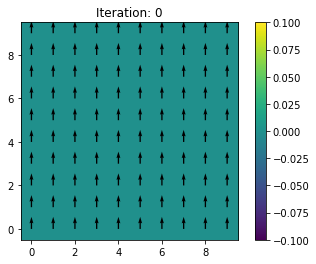

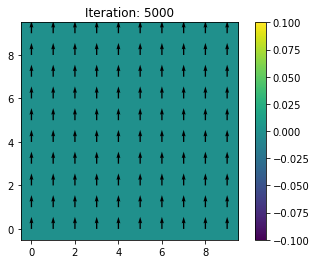

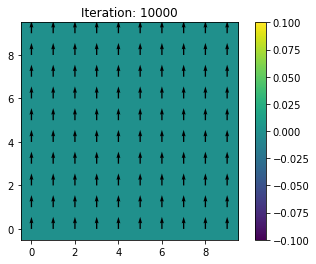

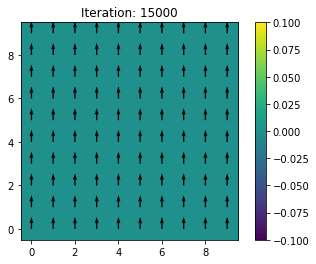

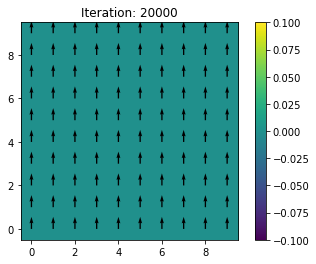

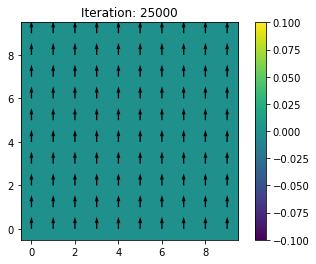

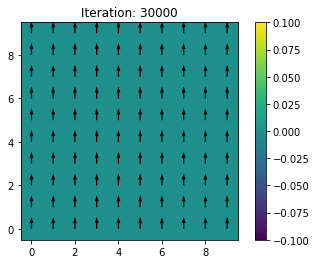

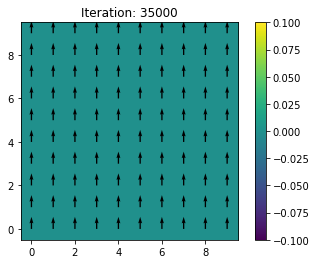

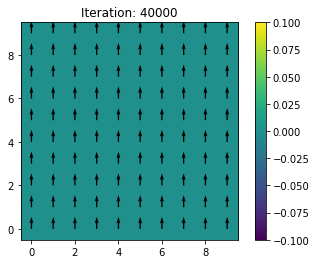

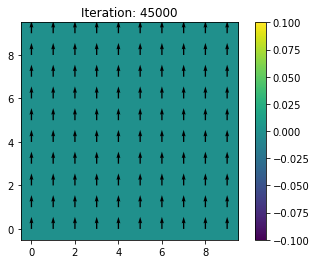

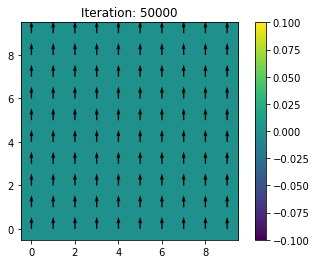

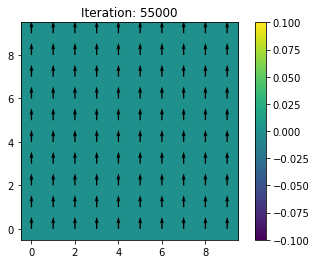

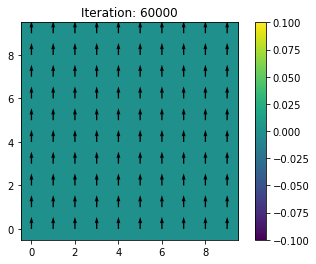

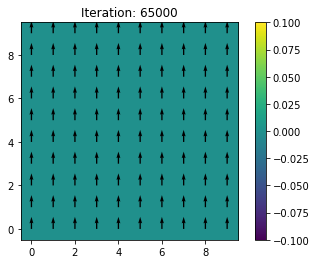

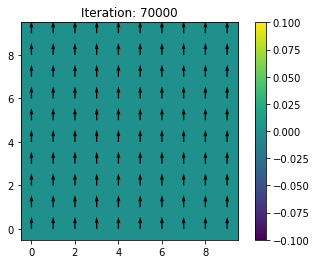

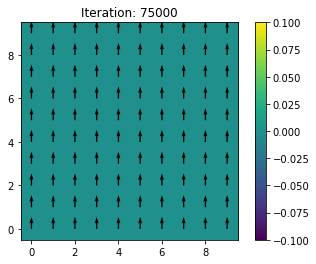

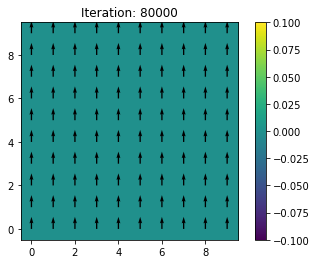

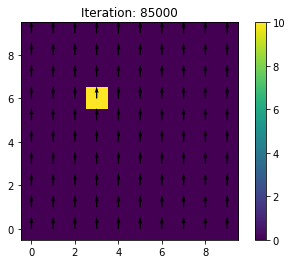

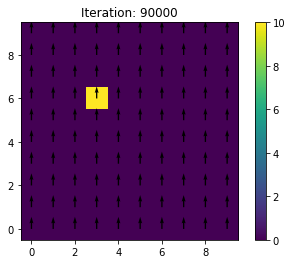

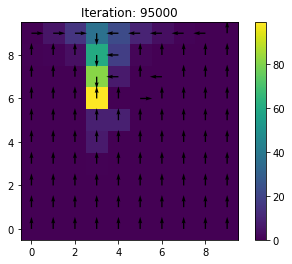

In [ ]:
testGridGoalLearn()

## 2.2) Stochastic-shortest-path
These are plots of the values of the states $V(s) = max_a Q(s, a)$ using the SSP formulation as we run 100,000 iterations of Q-value learning, plotting every 5,000 iterations. Note that the scale of the colors changes across the different plots, per the bar on the right of each plot.

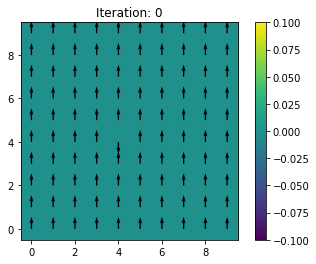

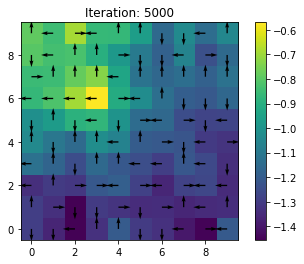

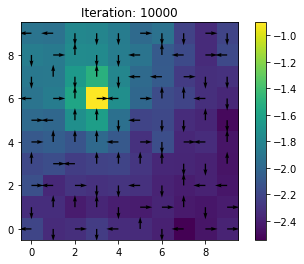

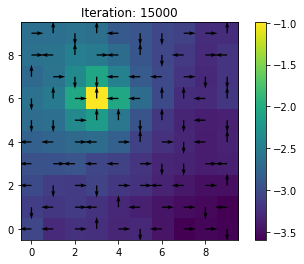

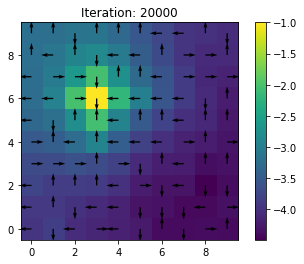

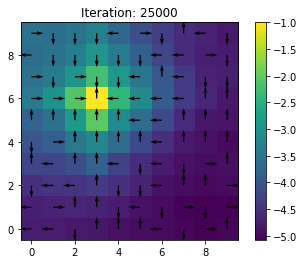

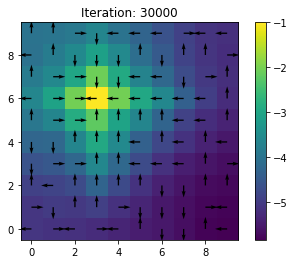

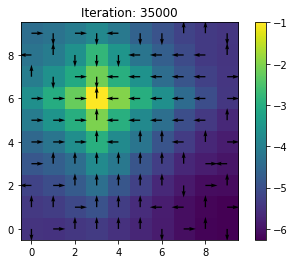

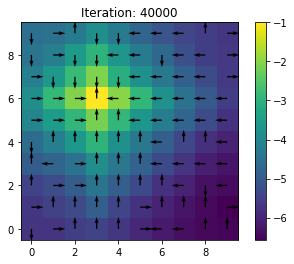

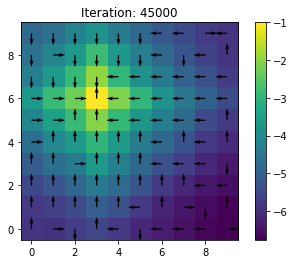

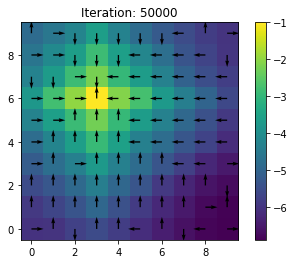

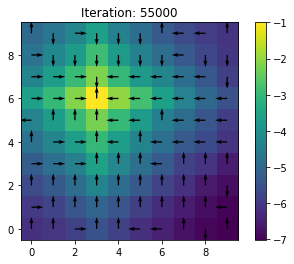

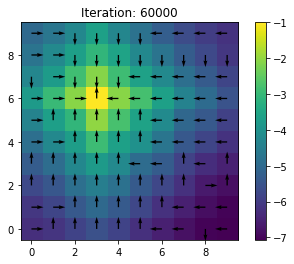

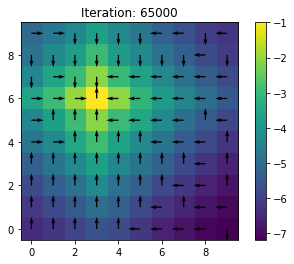

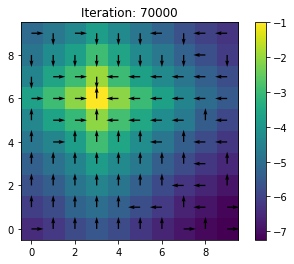

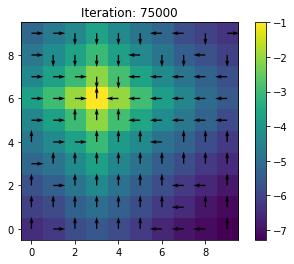

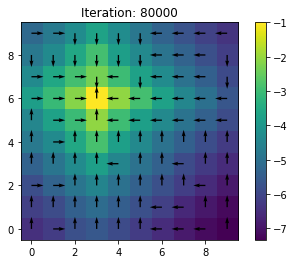

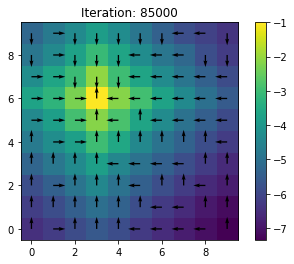

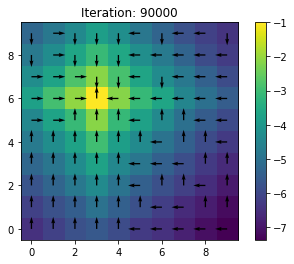

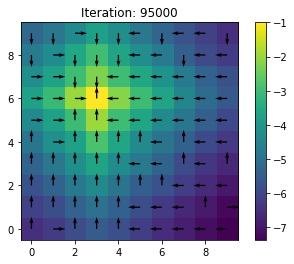

In [ ]:
testGridSSPLearn()

## 3.2) Versus Reality

Once you run the code below wait patiently until you see a yellow and purple square moving around on a teal background.  Ignore everything else for now.

score (0, 11.2)
score (10, 23.3)
score (20, 26.5)
score (30, 25.0)
score (40, 52.1)
score (50, 45.4)
score (60, 55.8)
score (70, 31.0)
score (80, 56.2)
score (90, 42.0)


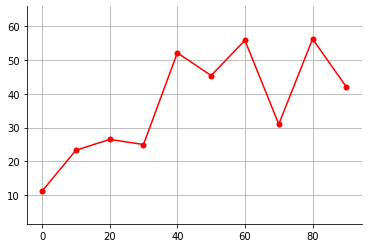

Reward 100
Reward 15
Reward 48
Reward 100
Reward 84
Reward 27
Reward 100
Reward 52
Reward 54


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward 6


<Figure size 432x288 with 0 Axes>

In [ ]:
try_tabular_batch_q_learning(iters=100)

Click play in the button right below the square. This is a movie of a policy playing the game [No Exit](https://en.wikipedia.org/wiki/No_Exit). It’s kind of like Pong: the purple square is the “ball” and the yellow square is your “paddle”. The actions are to move the paddle up, down, or keep it still.

The state is specified by the positions and velocities of the ball and paddle, with a special added “game over” state.

The transition model is a very approximate physics model of the ball reflecting off walls and the paddle, except if the ball gets past the paddle in the positive x direction, the game is over.

The agent gets a reward of +1 on every step it manages to survive.

When watching the game play out, you’ll sometimes see that the purple square gets near the right-hand border and then suddenly it changes to a state with the purple square in the bottom left and the yellow one in the upper right -- this means that the game terminated and then reset to the initial state.

Now we can go back and look at the other output in the notebook:

* First, we show a table of what happens during learning: after every 20 iterations of batch Q learning, we take the current greedy policy and run it to see what its average score is. This score represents how long the episode ran before the ball ran off the map, or 100 if it lasted for that long.

* Next is a plot of the score as a function of the amount of training.

* Finally, we run the greedy policy with respect to the last Q-value function for 10 games and report the rewards achieved on each game. We also make a movie of these 10 games, which is what we started out looking at.

**3.2)** Run the code given on the notebook for values of $\epsilon$ in the set ${0,0.5,1}$. Does your observation match your answers from 3.1?


Remember that this is a small instance, so sometimes the random noise of the environment might prevent you from seeing any useful information. Run the notebook two or three times if something doesn't line up with your expectation, and then ask for help.

score (0, 7.2)
score (20, 6.0)
score (40, 12.6)
score (60, 8.7)
score (80, 9.9)
score (100, 6.0)
score (120, 8.4)
score (140, 15.6)
score (160, 14.8)
score (180, 17.4)


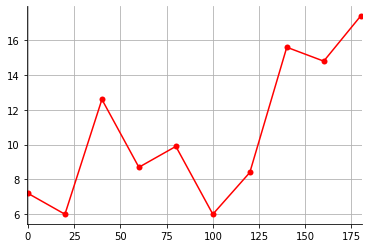

Reward 6
Reward 6
Reward 6
Reward 6
Reward 6
Reward 6
Reward 42
Reward 6
Reward 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward 6


<Figure size 432x288 with 0 Axes>

In [ ]:
try_tabular_batch_q_learning(iters=200, eps=0)

score (0, 9.6)
score (20, 17.7)
score (40, 60.7)
score (60, 52.9)
score (80, 35.3)
score (100, 56.6)
score (120, 78.8)
score (140, 86.7)
score (160, 75.2)
score (180, 83.6)


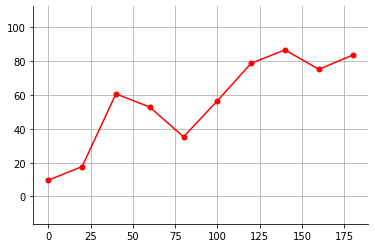

Reward 100
Reward 100
Reward 100
Reward 100
Reward 100
Reward 100
Reward 18
Reward 100
Reward 100


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward 100


<Figure size 432x288 with 0 Axes>

In [ ]:
try_tabular_batch_q_learning(iters=200, eps=0.5)

score (0, 15.6)
score (20, 18.0)
score (40, 20.1)
score (60, 56.3)
score (80, 57.7)
score (100, 70.7)
score (120, 92.6)
score (140, 74.3)
score (160, 80.2)
score (180, 92.1)


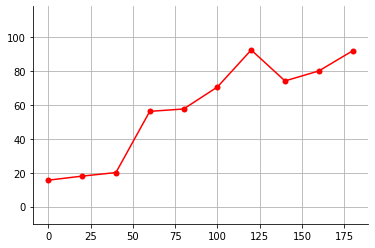

Reward 100
Reward 100
Reward 100
Reward 100
Reward 100
Reward 81
Reward 100
Reward 100
Reward 100


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward 100


<Figure size 432x288 with 0 Axes>

In [ ]:
try_tabular_batch_q_learning(iters=200, eps=1)

**(Optional)** Once you are done with the check off, play with the number of iterations in the colab until you get all of the methods to find a policy that scores 100 on all 10 of the final trials, and then observe the gameplay of the agents. You might expect the model that learned with $\epsilon = 1$ has a more jittery gameplay than the agent that learned with $\epsilon=0$ or $0.5$. Does that hold?
